In [ ]:
import pandas as pd
import numpy as np
import os
import random as rnd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train_data.txt to train_data.txt


In [ ]:
train_data_path = 'train_data.txt'

movie_titles = []
plot_summaries = []
genres = []

with open(train_data_path, 'r') as file:
    lines = file.readlines()

for line in lines:
    movie_data = line.strip().split(':::')
    movie_title = movie_data[1].strip()
    genre = movie_data[2].strip()
    plot_summary = movie_data[3].strip()


    movie_titles.append(movie_title)
    genres.append(genre)
    plot_summaries.append(plot_summary)


In [1]:
print("Printing first 5 values")
print("Movie Titles:", movie_titles[:5])
print("Genres:", genres[:5])
print("Plot Summaries:", plot_summaries[:5])


Printing first 5 values


NameError: ignored

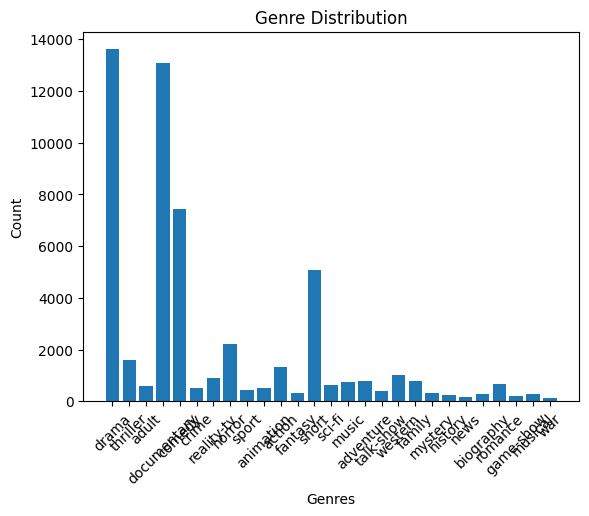

In [ ]:
# Counting the occurrences of each genre
genre_counts = Counter(genres)

# Separating genre labels and counts
genre_labels = list(genre_counts.keys())
genre_values = list(genre_counts.values())

# Creating a bar plot
plt.bar(genre_labels, genre_values)
plt.xticks(rotation=45)
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Genre Distribution')

plt.show()


In [ ]:
missing_values = any(not title or not genre or not summary for title, genre, summary in zip(movie_titles, genres, plot_summaries))
if missing_values:
    print("Missing values detected!")

# Check for duplicates
duplicates = len(movie_titles) != len(set(movie_titles))
if duplicates:
    print("Duplicate records detected!")



In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(plot_summaries)

X_train, X_val, y_train, y_val = train_test_split(tfidf_matrix, genres, test_size=0.2, random_state=42)


In [ ]:
naive_bayes_classifier = MultinomialNB()

naive_bayes_classifier.fit(X_train, y_train)   # Training the classifier using the training data

y_pred = naive_bayes_classifier.predict(X_val)  # Predict genre labels for the validation data

In [2]:
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy*100)

NameError: ignored

In [ ]:
report = classification_report(y_val, y_pred )  # Classification report

print("Classification Report:\n")
print(report)

Classification Report:

              precision    recall  f1-score   support

      action       0.00      0.00      0.00       263
       adult       0.00      0.00      0.00       112
   adventure       0.00      0.00      0.00       139
   animation       0.00      0.00      0.00       104
   biography       0.00      0.00      0.00        61
      comedy       0.57      0.03      0.06      1443
       crime       0.00      0.00      0.00       107
 documentary       0.54      0.90      0.67      2659
       drama       0.38      0.89      0.53      2697
      family       0.00      0.00      0.00       150
     fantasy       0.00      0.00      0.00        74
   game-show       0.00      0.00      0.00        40
     history       0.00      0.00      0.00        45
      horror       0.00      0.00      0.00       431
       music       0.00      0.00      0.00       144
     musical       0.00      0.00      0.00        50
     mystery       0.00      0.00      0.00        56
   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
uploaded2 = files.upload()

uploaded3 = files.upload()

Saving test_data.txt to test_data.txt


Saving test_data_solution.txt to test_data_solution.txt


In [ ]:
test_data_path = 'test_data.txt'

test_movie_titles = []
test_plot_summaries = []

with open(test_data_path, 'r') as file:
    lines = file.readlines()


for line in lines:

    test_movie_data = line.strip().split(':::')
    test_movie_title = test_movie_data[1].strip()
    test_plot_summary = test_movie_data[2].strip()

    test_movie_titles.append(test_movie_title)
    test_plot_summaries.append(test_plot_summary)

tfidf_vectorizer.fit(plot_summaries)

preprocessed_test_summaries = tfidf_vectorizer.transform(test_plot_summaries)

predicted_genres = naive_bayes_classifier.predict(preprocessed_test_summaries)

true_genres = []
with open('test_data_solution.txt', 'r') as file:
    for line in file:
        parts = line.strip().split(':::')
        true_genre = parts[2].strip()
        true_genres.append(true_genre)

correct_predictions = 0
total_predictions = len(true_genres)

for predicted_genre, true_genre in zip(predicted_genres, true_genres):
    if predicted_genre == true_genre:
        correct_predictions += 1

accuracy = correct_predictions / total_predictions
print("Accuracy:", accuracy*100)

Accuracy: 50.7380073800738


In [3]:
predicted_genres_array = np.array(predicted_genres)
true_genres_array = np.array(true_genres)

combined_genres = np.concatenate((predicted_genres_array, true_genres_array))

unique_genres = np.unique(combined_genres)

# bar plot for predicted and true genre
plt.figure(figsize=(12, 6))
sns.barplot(x=unique_genres, y=[predicted_genre_counts.get(genre, 0) for genre in unique_genres], color='blue', label='Predicted')
sns.barplot(x=unique_genres, y=[true_genre_counts.get(genre, 0) for genre in unique_genres], color='orange', label='True')
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Predicted vs. True Genre Distribution")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

NameError: ignored